In [ ]:
!pip install yfinance
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 16.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2


In [ ]:
import yfinance as yf
import pandas as pd
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from sklearn.model_selection import train_test_split
import pandas_ta as ta

In [ ]:
data = yf.download('^GSPC', period='2y', interval='1d')
data.to_csv('sp500_data_two_year.csv')
files.download('sp500_data_two_year.csv')

NameError: name 'yf' is not defined

In [ ]:
from google.colab import files
data = files.upload()

Saving sp500_data_two_year.csv to sp500_data_two_year.csv


In [ ]:
df = pd.read_csv('sp500_data_two_year.csv',header=[0, 1], index_col=0)
df.head(5)
columns = ['Close','High','Low','Open','Volume']
df.columns = columns
df.head(10)

,Close,High,Low,Open,Volume
Date,,,,,
2023-09-05,4496.830078,4514.290039,4496.009766,4510.060059,3526250000
2023-09-06,4465.479980,4490.350098,4442.379883,4490.350098,3418850000
2023-09-07,4451.140137,4457.810059,4430.459961,4434.549805,3763760000
2023-09-08,4457.490234,4473.529785,4448.379883,4451.299805,3259290000
2023-09-11,4487.459961,4490.770020,4467.890137,4480.979980,3369920000
2023-09-12,4461.899902,4487.109863,4456.830078,4473.270020,3435740000
2023-09-13,4467.439941,4479.390137,4453.520020,4462.649902,3529430000
2023-09-14,4505.100098,4511.990234,4478.689941,4487.779785,3648720000
2023-09-15,4450.319824,4497.979980,4447.209961,4497.979980,6932230000


In [ ]:
#Adding new features for model building
df['Target'] = df['Close'] - df.Open
df['Target'] = df['Target'].shift(-1)
df['Target Class'] = [1 if i >= 0 else 0 for i in df['Target']]
df['TargetNextClose'] = df['Close'].shift(-1)
df.head(10)

,Close,High,Low,Open,Volume,Target,Target Class,TargetNextClose
Date,,,,,,,,
2023-09-05,4496.830078,4514.290039,4496.009766,4510.060059,3526250000,-24.870117,0,4465.479980
2023-09-06,4465.479980,4490.350098,4442.379883,4490.350098,3418850000,16.590332,1,4451.140137
2023-09-07,4451.140137,4457.810059,4430.459961,4434.549805,3763760000,6.190430,1,4457.490234
2023-09-08,4457.490234,4473.529785,4448.379883,4451.299805,3259290000,6.479980,1,4487.459961
2023-09-11,4487.459961,4490.770020,4467.890137,4480.979980,3369920000,-11.370117,0,4461.899902
2023-09-12,4461.899902,4487.109863,4456.830078,4473.270020,3435740000,4.790039,1,4467.439941
2023-09-13,4467.439941,4479.390137,4453.520020,4462.649902,3529430000,17.320312,1,4505.100098
2023-09-14,4505.100098,4511.990234,4478.689941,4487.779785,3648720000,-47.660156,0,4450.319824
2023-09-15,4450.319824,4497.979980,4447.209961,4497.979980,6932230000,8.399902,1,4453.529785


In [ ]:
Scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = Scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns,index=df.index)
df_scaled.head(10)

,Close,High,Low,Open,Volume,Target,Target Class,TargetNextClose
Date,,,,,,,,
2023-09-05,0.159137,0.152067,0.165975,0.157739,0.240347,0.272221,0.0,0.145989
2023-09-06,0.145989,0.141886,0.143282,0.149352,0.226666,0.330642,1.0,0.139975
2023-09-07,0.139975,0.128049,0.138238,0.125606,0.270603,0.315988,1.0,0.142639
2023-09-08,0.142639,0.134733,0.145820,0.132734,0.206340,0.316396,1.0,0.155207
2023-09-11,0.155207,0.142065,0.154076,0.145364,0.220433,0.291244,0.0,0.144488
2023-09-12,0.144488,0.140508,0.149396,0.142083,0.228817,0.314015,1.0,0.146811
2023-09-13,0.146811,0.137226,0.147996,0.137564,0.240752,0.331671,1.0,0.162605
2023-09-14,0.162605,0.151089,0.158646,0.148258,0.255948,0.240108,0.0,0.139631
2023-09-15,0.139631,0.145131,0.145325,0.152599,0.674225,0.319101,1.0,0.140978


In [ ]:
# Create sequences for RNN
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        # Access data using iloc to get values from the pandas Series
        X.append(data.iloc[i:(i + time_step)])
        y.append(data.iloc[i + time_step])
    return np.array(X), np.array(y)

time_step = 50
X, y = create_sequences(df_scaled['Close'], time_step)
X.shape, y.shape

((450, 50), (450,))

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

# Reshape data for RNN input (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the RNN model
model = Sequential([
    Input(shape=(X_train.shape[1],X_train.shape[2])),
    SimpleRNN(units=32,activation='relu'),
    Dense(units=1)
    ]
)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.8279 - val_loss: 0.5154
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.5691 - val_loss: 0.3416
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.3536 - val_loss: 0.1116
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0753 - val_loss: 0.0233
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0132 - val_loss: 0.0052
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0013 - val_loss: 9.1377e-04
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0012 - val_loss: 9.2706e-04
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0013 - val_loss: 9.6805e-04
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


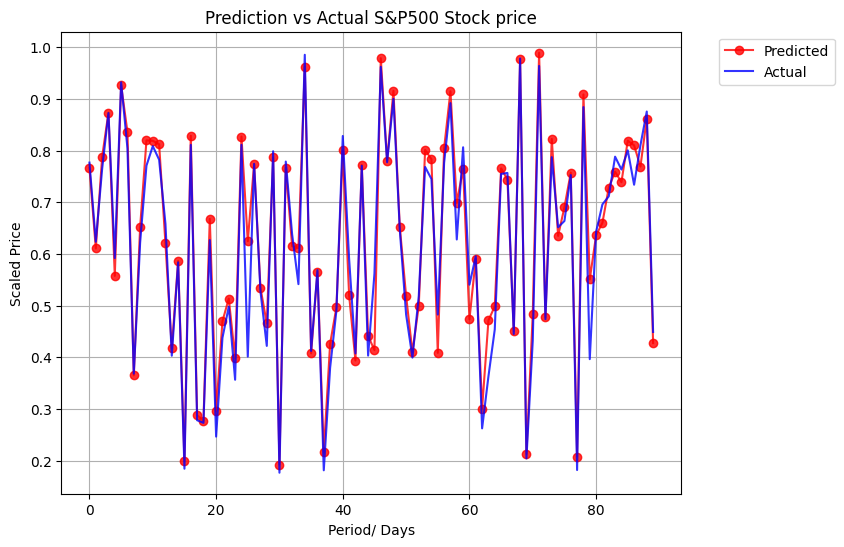

In [ ]:
#Visualization
y_pred = model.predict(X_test)
y_pred.shape
y_test = np.reshape(y_test,[y_pred.shape[0],1])
plt.figure(figsize=(8,6))
plt.title('Prediction vs Actual S&P500 Stock price')
plt.xlabel('Period/ Days')
plt.ylabel('Scaled Price')
plt.plot(y_pred,label='Predicted',color='red',marker='o',alpha=0.8)
plt.plot(y_test,label='Actual',color='blue',alpha=0.8)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()